# Notebook for make profiling of di-f Correlation experiments

## Experiment name: mxretailsalary1

## Team roles:
* PipeMaster: jag.pascoe
* BizEngineer: 
* DataEngineer:
* MLEngineer:
* SWEngineer:

## Description (Use case):
Predict salary per day estimation to be obtained for working in retail sector in any state of Mexico.
Supposing you are looking for being hired in a Retail Business in any of Mexico's state you want to. You want to predict which would be the base salary per day you might get as attendant of that retail business. This salary not include any commision, tax, or any other concept.

## Type of experiment: Correlation
## Independent Variables (inputs):
1) State of Mexico where you are supposing to get hired (CAT). 
2) How many employees (including yourself) work in that particular business now (NUMBER)
3) How much sales per day in average, you estimate you will provide to that business in pesos (FLOAT)

## Dependent Variables (outputs):
1) Estimated base salary per day (FLOAT)

In [793]:
%load_ext autoreload
%autoreload 2
# The %load_ext autoreload and %autoreload 2 magic commands are used to automatically 
# reload modules when they are changed. This can be useful when you are developing code 
# in an interactive environment, as it allows you to see the changes you make to your modules 
# without having to restart the kernel.
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf

# for global initialization: NOT RECOMMENDED
#initialize(version_base=None, config_path="../src/conf")
#compose(config_name='config')

with initialize(version_base=None, config_path="../src/conf"):
    cfg = compose(config_name='config')
    print(cfg)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'general_ml': {'seed': 123, 'encoding': 'iso-8859-1', 'cloud': 'AWS'}, 'paths': {'project_dir': '...', 'raw_data': '${hydra:runtime.cwd}/data/raw', 'interim_data': '${hydra:runtime.cwd}/data/interim', 'processed_data': '${hydra:runtime.cwd}/data/processed', 'reports': '${hydra:runtime.cwd}/reports'}, 'cloud_paths': {'bucket_path': 'dif-b-democlient-sklearn', 'experiment_path': '${cloud_paths.bucket_path}/mxretailsalary1', 'mlflow_path': '${cloud_paths.experiment_path}/mlflow', 'reports_path': '${cloud_paths.experiment_path}/reports', 'rawdata_path': '${cloud_paths.experiment_path}/raw-data', 'dvc_path': '${cloud_paths.experiment_path}/dvc-store'}, 'file_names': {'raw_file': 'raw-data.csv', 'data_file': 'datafile.csv', 'train_features': 'train_features.csv', 'train_labels': 'train_labels.csv', 'validation_features': 'valid_features.csv', 'validation_labels': 'valid_labels.csv', 'test_features': 'tes

In [794]:
import pandas as pd
import numpy as np
import ydata_profiling as yp
import os

In [795]:
#reading raw-data

raw_file = pd.read_csv(os.path.join('../data/raw', cfg.file_names.raw_file), 
                   #encoding=cfg.general_ml.encoding,
                   )
raw_file.head()

,state,municipio,businesses,employees,payroll,expenditures,income,payroll_employee_day,profits_biz_day,sales_employee_day,employees_unit
0,Ags,Aguascalientes,11402,120923,4997.813674,129044.643300,159695.334000,114.807074,6249.604612,3668.434872,10.6054201
1,Ags,Asientos,231,1647,29.092255,524.807734,621.055144,49.066071,807.5415528,1047.451838,7.12987013
2,Ags,Calvillo,591,4605,99.342787,1743.278407,2246.247441,59.924470,1897.09648,1354.956835,7.791878173
3,Ags,Cosio,104,468,4.577495,101.941048,136.364948,27.169366,797.1796419,809.383597,4.5
4,Ags,El Llano,104,860,14.802274,342.630524,427.291666,47.810963,1865.888567,1380.141041,8.269230769


In [796]:
#cutting dataset for this experiment
data=raw_file[['state',
        'businesses',
        'employees',
        'payroll',
        'income']]
data

,state,businesses,employees,payroll,income
0,Ags,11402,120923,4997.813674,159695.334000
1,Ags,231,1647,29.092255,621.055144
2,Ags,591,4605,99.342787,2246.247441
3,Ags,104,468,4.577495,136.364948
4,Ags,104,860,14.802274,427.291666
...,...,...,...,...,...
2482,Zacatecas,147,785,2.811121,160.114046
2483,Zacatecas,149,875,4.875017,289.174975
2484,Zacatecas,96,604,7.800028,219.851736
2485,Zacatecas,339,2043,34.189010,1282.438977


In [797]:
data=data.sort_values(by='businesses',ascending=False)
data = data.head(750)
data = data.sample(frac=1).reset_index(drop=True)
data.groupby('state').count()

,businesses,employees,payroll,income
state,,,,
Ags,6,6,6,6
BC,6,6,6,6
BCS,5,5,5,5
CDMX,17,17,17,17
Campeche,8,8,8,8
Chiapas,51,51,51,51
Chihuahua,10,10,10,10
Coahuila,15,15,15,15
Colima,7,7,7,7


In [798]:
#reviewing data types
data.dtypes

state          object
businesses      int64
employees       int64
payroll       float64
income        float64
dtype: object

In [799]:
# Finding number of records with 0, NaN, or empty values
mask=data.apply(lambda x: any([val == 0 or pd.isna(val) or val == '' for val in x]), axis=1)
mask.sum()



0

In [800]:
#finding recosrds with nan 
data.isna().sum()

state         0
businesses    0
employees     0
payroll       0
income        0
dtype: int64

In [801]:
#correcting nan in Payroll by substitute them with the payrrol mean by estado.


# Compute the average by category
payroll_average = data.groupby('state')['payroll'].transform('mean')
employees_average = data.groupby('state')['employees'].transform('mean')


# Replace NaN values with the corresponding category average
payroll2 = data['payroll'].fillna(data['employees']*payroll_average/employees_average)
data['payroll']=payroll2

# Display the modified dataframe
print(data[mask])


Empty DataFrame
Columns: [state, businesses, employees, payroll, income]
Index: []


In [802]:
# check records with zeros
data[data['employees']==0]
data[data['businesses']==0]

,state,businesses,employees,payroll,income


In [803]:
# Replace cero values with other value
data.loc[data['businesses'] == 0, 'businesses'] = 1.0
data.head()


,state,businesses,employees,payroll,income
0,Michoacan,2805,21660,1054.017348,46595.623740
1,Yucatan,543,3651,45.054923,2261.012486
2,Tlaxcala,673,2838,8.667468,311.399556
3,Puebla,2161,10213,192.958371,4525.085034
4,Hidalgo,991,4714,226.158504,4696.172716


In [804]:
# create new fields 

data['income_employee_day']=data['income']*1000000/data['employees']/360
data['employees_business'] = (data['employees']/data['businesses']+0.5).astype(int)
data['salary_employee_day']=data['payroll']*1000000/data['employees']/360

#droping innecesary fields
data=data.drop(['employees', 'income','businesses','payroll'],axis=1)

# correcting data types and renaming the fields to be more accurate
data['state']=data['state'].astype('category')

data.head()

,state,income_employee_day,employees_business,salary_employee_day
0,Michoacan,5975.636573,8,135.172021
1,Yucatan,1720.238356,7,34.278982
2,Tlaxcala,304.791672,4,8.483545
3,Puebla,1230.753026,5,52.481687
4,Hidalgo,2767.272849,5,133.266455


In [805]:
#running the profiler to review data

ProfileReport = yp.ProfileReport(data, title=str(cfg.file_names.data_profiling_report), explorative=True)
ProfileReport.to_file(os.path.join('../reports', cfg.file_names.data_profiling_report), 
                      #encoding=cfg.general_ml.encoding
                     )

ProfileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [806]:
   
#Choose the Ml model to be applied, among: regression, Classifications, time_series, Clustering, NLP
from pycaret.regression import *

In [807]:
#to show docstring of setup() function
?setup

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]]] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    preprocess: 

In [808]:
model_to_find =   setup(data = data, #see above 
                        #log_experiment = True,
                        #experiment_name = f'{cfg.general_ml.client}-{cfg.general_ml.project}-{cfg.general_ml.experiment}',
                        #target = cfg.data_fields.label, # get the target label from cfg
                        target='salary_employee_day',
                        #train_size=0.6, #default = 0.7
                        session_id=cfg.general_ml.seed, # get the seed from config
                        #train_size = 1.0-float(cfg.data_pipeline.data_transform_params.percent_valid), #get %valid from cfg
                        transformation=True, 
                        #transformation_method='quantile',
                        #fix_imbalance = True, #8:2
                        normalize=True,
                        normalize_method="minmax",
                        #polynomial_features=True,
                        #polynomial_degree = 5,
                        max_encoding_ohe =32, #default=25,
                        #remove_multicollinearity=True,
                        #categorical_features=['state'],
                        #remove_outliers=True,
                        #outliers_threshold=0.075, #default=0.05
                        )

,Description,Value
0,Session id,123
1,Target,salary_employee_day
2,Target type,Regression
3,Original data shape,"(750, 4)"
4,Transformed data shape,"(750, 35)"
5,Transformed train set shape,"(525, 35)"
6,Transformed test set shape,"(225, 35)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [809]:

get_config('dataset_transformed')

,state_Puebla,state_Guerrero,state_Zacatecas,state_Veracruz,state_Mexico,state_Guanajuato,state_Campeche,state_Tamaulipas,state_Tabasco,state_Tlaxcala,...,state_Nayarit,state_Durango,state_CDMX,state_Sinaloa,state_Sonora,state_SLP,state_Colima,income_employee_day,employees_business,salary_employee_day
240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.622235,0.492613,74.662659
100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294564,0.382275,20.091311
626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.572091,0.692944,81.828560
273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625685,0.492613,96.803093
349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475200,0.492613,39.797474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.426294,0.382275,55.899139
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500209,0.228710,64.079895
155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422135,0.382275,29.222069
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.629620,0.640760,126.304352


In [811]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,12.8008,343.4431,18.1826,0.7279,0.4305,0.3822,1.3030
br,Bayesian Ridge,12.7828,343.3628,18.2060,0.7276,0.4388,0.3924,0.8930
lr,Linear Regression,12.8592,344.7413,18.2577,0.7258,0.4401,0.4040,1.5720
ridge,Ridge Regression,12.8071,349.1199,18.3431,0.7242,0.4223,0.3727,1.1350
gbr,Gradient Boosting Regressor,12.4573,353.3155,18.4683,0.7198,0.3379,0.3025,1.1740
catboost,CatBoost Regressor,12.4684,358.3218,18.6103,0.7167,0.3342,0.2915,1.5110
par,Passive Aggressive Regressor,13.0824,362.1426,18.7137,0.7117,0.4592,0.3836,0.8840
rf,Random Forest Regressor,13.3056,396.7971,19.6171,0.6830,0.3535,0.3104,1.6610
omp,Orthogonal Matching Pursuit,14.7763,429.4728,20.4345,0.6571,0.4597,0.4546,1.3530
et,Extra Trees Regressor,13.7653,434.1994,20.6793,0.6406,0.3677,0.3181,1.4630


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [812]:
# And create the selected model in ten kfolds

selected_model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.3499,282.8366,16.8177,0.7632,0.5110,0.4473
1,13.5616,371.1785,19.2660,0.6837,0.4968,0.3557
2,12.9507,293.4229,17.1296,0.7008,0.3869,0.3754
3,9.4136,123.6631,11.1204,0.8658,0.4481,0.4692
4,13.3509,337.4684,18.3703,0.7631,0.3966,0.4310
5,13.4178,536.1409,23.1547,0.5759,0.4815,0.5009
6,13.4878,350.4924,18.7214,0.7168,0.3034,0.2260
7,10.1082,219.0721,14.8011,0.7041,0.3255,0.2496
8,13.1208,327.9624,18.1097,0.7356,0.4717,0.3231


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [813]:
# Now lets find the best hyperparameters for the selected model 

tuned_model = tune_model(selected_model, 
                         optimize = 'R2',
                         n_iter=10,
                         choose_better=True,
                        )



,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:03:58
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [763]:
predict_model(tuned_model)

,state,income_employee_day,employees_business,salary_employee_day,prediction_label
57,Nuevo Leon,2123.047363,13,91.509048,76.397333
478,Chiapas,1941.685303,5,21.599730,57.575118
597,Queretaro,3604.338379,9,75.386238,85.802403
689,Jalisco,8764.569336,9,77.496475,95.962746
647,Yucatan,1815.114624,8,86.346100,60.242556
...,...,...,...,...,...
617,Chiapas,472.268311,4,10.251340,8.227248
226,Jalisco,865.187500,6,21.638393,31.623457
26,Michoacan,541.506897,5,16.975746,21.908840
348,Hidalgo,3309.986328,5,57.862019,92.329387


In [764]:
#for clasifier
#bagged_dt = ensemble_model(tuned_model, 
#                           method='Boosting',
#                           choose_better=True
#                          )

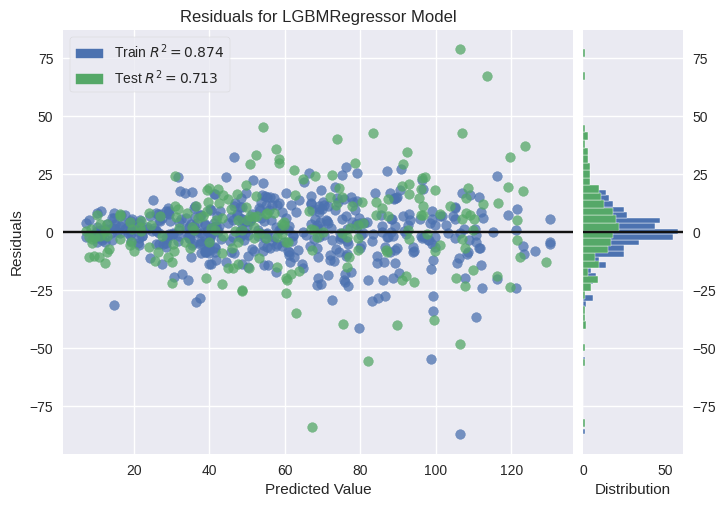

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [765]:
# and .. evaluate the model

plot_model(tuned_model)
evaluate_model(tuned_model)



In [766]:
# Only for classification
#interpret_model(tuned_model)

In [767]:
dashboard(tuned_model)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks.

In [768]:
deep_check(tuned_model)

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_PLVNAX7ZMBTQT8E2MZ17IFOCT">Full Suite</h1>\n<…

In [769]:
# Finally trains a the model on the entire dataset including the hold-out set.

final_model = finalize_model(tuned_model)
final_model




Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['income_employee_day',
                                             'employees_business'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['state'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['state'],
                                    tra...=TargetEncoder(cols=['state'],
                                                              handle_missing='return_nan'))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator', LGBMRegressor(random_state=123))])

In [770]:
get_config('X_transformed')

,state,income_employee_day,employees_business
63,0.201075,1.425386,0.687166
34,0.979646,-0.655274,-0.201409
33,1.092863,-1.259237,-1.777388
583,0.182101,2.810290,0.687166
457,-0.484366,1.482044,1.475067
...,...,...,...
617,-1.340800,-1.861335,-1.777388
226,-0.086717,-1.053872,-0.201409
26,1.238457,-1.687961,-0.861279
348,1.092863,1.158161,-0.861279


In [771]:
# save the model

#save_model(final_model, os.path.join(cfg.paths.models, cfg.file_names.ml_profiling_model))
